# Exploratory Data Analysis in Python
## Data Cleaning and Imputation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
salaries = pd.read_csv('../datasets/ds_salaries.csv')
salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
# Checking for missing values
salaries.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
# Vai se importante para saber qunato é 5% dos dados
# vamoa eliminar caso se for essa quantidade de representividade 
threshold = len(salaries) * 0.05
threshold

30.35

In [6]:
# Toda coluna que tiver dados faltando que representa menos de 5%
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
print(cols_to_drop)

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')


In [7]:
# Vai retirar esse dados faltante 
salaries.dropna(subset=cols_to_drop, inplace=True)

In [8]:
# Verificando se ainda existe valores faltante 
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]
print(cols_with_missing_values)

Index([], dtype='object')


In [9]:
# estamos substindo pela moda 
for col in cols_with_missing_values[:-1]:
    salaries[col].fillna(salaries[col].mode()[0])

## substituindo pela mediana

Esse  exemplo é muito interessante, pois estamos relacionando o salario com a experiencia.
Para isso estamos usando grouby para pegar a mediana do salario relacionado com a experiência. 
Repare que estamos salvando a mediana como um dicionario.

Depois, estamos usando fillna para substituir valores ausente, para isso usamos map para que consulta no dicionario a mediana.

finalmente imprimimos para verificar se esta tudo correto

In [10]:
salaries_dict = salaries.groupby("experience_level")["salary_in_usd"].median().to_dict()
print(salaries_dict)

{'EN': 56500.0, 'EX': 171437.5, 'MI': 76940.0, 'SE': 135500.0}


In [11]:
salaries["salary_in_usd"] = salaries["salary_in_usd"].fillna(salaries["experience_level"].map(salaries_dict))

In [12]:
print(salaries.isna().sum())

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


# Converting and analyzing categorical data
Segundo bloco 

In [3]:
# estamos imprimindo o tipo "object"
print(salaries.select_dtypes("object").head())

  experience_level employment_type                   job_title  \
0               MI              FT              Data Scientist   
1               SE              FT  Machine Learning Scientist   
2               SE              FT           Big Data Engineer   
3               MI              FT        Product Data Analyst   
4               SE              FT   Machine Learning Engineer   

  salary_currency employee_residence company_location company_size  
0             EUR                 DE               DE            L  
1             USD                 JP               JP            S  
2             GBP                 GB               GB            M  
3             USD                 HN               HN            S  
4             USD                 US               US            L  


In [5]:
# Conta a quantidade de vezes que apareceu 
print(salaries["job_title"].value_counts())

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [7]:
# Serve para nos temos uma noção de quantidade que existe de trabalho
print(salaries["job_title"].nunique())

50


In [8]:
# str.contains vai verificar se contem o conteudo correspondente, retorna verdadeiro ou falso 
# O pipe (|) vai servir como ou, esse comando serve para pegar "Machine Learning" ou "AI" 
salaries["job_title"].str.contains("Machine Learning|AI")

0      False
1       True
2      False
3      False
4       True
       ...  
602    False
603    False
604    False
605    False
606     True
Name: job_title, Length: 607, dtype: bool

## Criando categoria 
Como já tinhamos visto "str.contains"  server para saber se tem ou não tem o valor o mesmo valor, caso sim, ele retorna True caso contrario retorna False.

job_categories ->  vai ser os tipos de categorias

data_science ate  consulatant -> serão os "criterio" para se daquela categoria
Exemplo: se na coluna job_title, conter a palavara "Data Science" ou "NLP" vai ser armazenado True na lista "conditions", claro que analise esta sendo feito linha por linha

contions -> seria uma lista booleano que corresponde cada coluna a cadegoria 

np.select(conditions, job_categories, default="Other") -> que faz a substituição da categoraia como nos desejamos 

In [12]:
job_categories = ["Data Science", "Data Analytics", "Data Engineering", "Machine Learning", "Managerial", "Consultant"]

data_science = "Data Scientist|NLP"
data_analyst = "Analyst|Analytics"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_engineer = "Machine Learning|ML|Big Data|AI"
manager = "Manager|Head|Director|Lead|Principal|Staff"
consultant = "Consultant|Freelance"

In [13]:
conditions = [
(salaries["job_title"].str.contains(data_science)),
(salaries["job_title"].str.contains(data_analyst)),
(salaries["job_title"].str.contains(data_engineer)),
(salaries["job_title"].str.contains(ml_engineer)),
(salaries["job_title"].str.contains(manager)),
(salaries["job_title"].str.contains(consultant))
]


In [18]:
salaries["Job_Category"] = np.select(conditions, job_categories, default="Other")

In [19]:
print(salaries[["job_title", "Job_Category"]].head())

                    job_title      Job_Category
0              Data Scientist      Data Science
1  Machine Learning Scientist  Machine Learning
2           Big Data Engineer  Data Engineering
3        Product Data Analyst    Data Analytics
4   Machine Learning Engineer  Machine Learning


NameError: name 'plt' is not defined

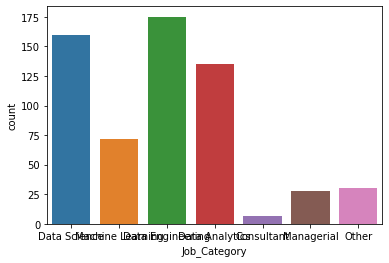

In [22]:
sns.countplot(data=salaries, x="Job_Category")
plt.show()

### Duvida 

Como criar para ter mais de um tipo de categoria 

# Working with numeric data
Terceiro bloco 

In [4]:
# Queremos ver os type da coluna para verifica se precisa se convertido 
print(salaries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None


### Convetendo object para float

Os dados que eles dão já esta limpo, ou seja, não da para replicar o mesmo exemplo e nem faz sentindo, então 
vamos supor que temos:

~~~python
print(salaries["Salary_In_Rupees"].head())
~~~
saída
 ~~~
0 20,688,070.00
1 8,674,985.00
2 1,591,390.00
3 11,935,425.00
4 5,729,004.00
Name: Salary_In_Rupees, dtype: object
~~~

Se nos transforma diretamente em float vai dá ruim por causa da virgula, antes de transformar em float devemos eliminar para isso vamos usar replace:
~~~ python
pd.Series.str.replace("characters to remove", "characters to replace them with")
~~~

ou seja 

~~~ python 
salaries["Salary_In_Rupees"] = salaries["Salary_In_Rupees"].str.replace(",", "")
print(salary["Salary_In_Rupees"].head())
~~~

Saída
~~~
1 20688070.00
2 8674985.00
3 1591390.00
4 11935425.00
5 5729004.00
Name: Salary_In_Rupees, dtype: object
~~~

Finalmente vamos converter 

~~~ python 
salaries["Salary_In_Rupees"] = salaries["Salary_In_Rupees"].astype(float)
~~~

No exemplo ele quis conveter ruppes em dolar, basta multiplicar por 0.012

~~~python
salaries["Salary_USD"] = salaries["Salary_In_Rupees"] * 0.012
~~~

## Previewing the new column

In [7]:
print(salaries[["salary", "salary_in_usd"]].head())

   salary  salary_in_usd
0   70000          79833
1  260000         260000
2   85000         109024
3   20000          20000
4  150000         150000


## Adding summary statistics into a DataFrame

In [8]:
salaries.groupby("company_size")["salary_in_usd"].mean()

company_size
L    119242.994949
M    116905.466258
S     77632.674699
Name: salary_in_usd, dtype: float64

### Adding summary statistics into a DataFrame

In [12]:
salaries["std_dev"] = salaries.groupby("experience_level")["salary_in_usd"].transform(lambda x: x.std())
print(salaries[["experience_level", "std_dev"]].value_counts())

experience_level  std_dev      
SE                57691.978337     280
MI                63901.057478     213
EN                44395.541126      88
EX                117071.255697     26
dtype: int64


In [13]:
salaries["median_by_comp_size"] = salaries.groupby("experience_level")["salary_in_usd"].transform(lambda x: x.median())
print(salaries[["experience_level", "median_by_comp_size"]].head())

  experience_level  median_by_comp_size
0               MI              76940.0
1               SE             135500.0
2               SE             135500.0
3               MI              76940.0
4               SE             135500.0


# Handling outliers
4 Bloco


NameError: name 'plt' is not defined

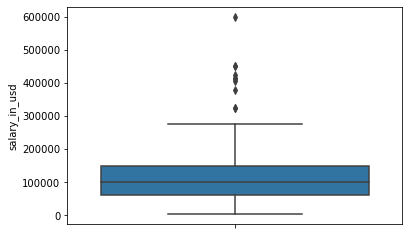

In [14]:
sns.boxplot(data=salaries, y="salary_in_usd")
plt.show()

## Identifying thresholds

In [15]:
# 75th percentile
seventy_fifth = salaries["salary_in_usd"].quantile(0.75)
# 25th percentile
twenty_fifth = salaries["salary_in_usd"].quantile(0.25)
# Interquartile range
salaries_iqr = seventy_fifth - twenty_fifth
print(salaries_iqr)

87274.0


## Identifying outliers

In [16]:
# Upper threshold
upper = seventy_fifth + (1.5 * salaries_iqr)
# Lower threshold
lower = twenty_fifth - (1.5 * salaries_iqr)
print(upper, lower)

280911.0 -68185.0


## Subsetting our data

In [17]:
salaries[(salaries["salary_in_usd"] < lower) | (salaries["salary_in_usd"] > upper)] [["experience_level", "employee_residence", "salary_in_usd"]]

,experience_level,employee_residence,salary_in_usd
25,EX,US,325000
33,MI,US,450000
63,SE,US,412000
97,MI,US,450000
157,MI,US,423000
225,EX,US,416000
252,EX,US,600000
482,EX,US,324000
519,SE,US,380000
523,SE,US,405000


## Dropping outliers

In [18]:
no_outliers = salaries[(salaries["salary_in_usd"] > lower) & (salaries["salary_in_usd"] < upper)]

In [20]:
no_outliers.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio,std_dev,median_by_comp_size
count,597.000000,597.000000,5.970000e+02,597.000000,597.000000,597.000000,597.000000
mean,304.095477,2021.412060,3.224171e+05,107168.855946,70.686767,60104.313759,104580.443886
std,174.888716,0.688634,1.557181e+06,58555.516292,40.797800,12806.618613,34926.222063
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.000000,44395.541126,56500.000000
25%,153.000000,2021.000000,6.999900e+04,62649.000000,50.000000,57691.978337,76940.000000
50%,305.000000,2022.000000,1.129000e+05,100000.000000,100.000000,57691.978337,135500.000000
75%,454.000000,2022.000000,1.600000e+05,148261.000000,100.000000,63901.057478,135500.000000
max,606.000000,2022.000000,3.040000e+07,276000.000000,100.000000,117071.255697,171437.500000


ok, finalizado com sucesso 